#Visualization EuroSQL

In [0]:
#import libraries
import pandas as pd
from pyspark.sql import SparkSession

In [0]:
#Spark Session
spark = SparkSession.builder \
    .appName("euros_sql_visulization") \
    .getOrCreate()

In [0]:
#getting data from sql table and into pandas dataframe
groupstage = spark.sql("SELECT * FROM GroupStageResults")
groupstage_pd = groupstage.toPandas()

#converting to string and removing .0 from floats occuring after conversion
groupstage_pd = groupstage_pd.applymap(lambda x: str(x).split(".")[0])

display(groupstage_pd)

GroupName,TeamName,MatchesPlayed,MatchesWon,MatchesLost,MatchesDrawn,GF,GA,GD,TotalPoints,Position
A,Switzerland,3,2,1,0,11,7,4,6,A1
A,Germany,3,2,1,0,7,10,-3,6,A2
A,Scotland,3,1,2,0,7,7,0,3,A3
A,Hungary,3,1,2,0,8,9,-1,3,A4
B,Croatia,3,2,0,1,9,3,6,7,B1
B,Italy,3,1,0,2,4,3,1,5,B2
B,Albania,3,1,2,0,5,7,-2,3,B3
B,Spain,3,0,2,1,5,10,-5,1,B4
C,Denmark,3,3,0,0,15,5,10,9,C1
C,Slovenia,3,2,1,0,12,8,4,6,C2


In [0]:
#GroupStage Visualization Table
euro_vis = pd.DataFrame({
    'Grp/Pos': groupstage_pd['Position'],
    'Country': groupstage_pd['TeamName'],
    'MP': groupstage_pd['MatchesPlayed'],
    'W': groupstage_pd['MatchesWon'],
    'D': groupstage_pd['MatchesDrawn'],
    'L': groupstage_pd['MatchesLost'],
    'GF': groupstage_pd['GF'],
    'GA': groupstage_pd['GA'],
    'GD': groupstage_pd['GD'],
    'Pts': groupstage_pd['TotalPoints']
})

In [0]:
#empty row for group stage
mtgs_row_pd = pd.DataFrame({col: [''] for col in euro_vis.columns})

In [0]:
#splitting into left and right for visulaization
left_gs = euro_vis[euro_vis['Grp/Pos'].str.contains('^[ABC]')]

right_gs = euro_vis[euro_vis['Grp/Pos'].str.contains('^[DEF]')]

#reseting index for both df
left_gs.reset_index(drop=True, inplace=True)
right_gs.reset_index(drop=True, inplace=True)

display(left_gs)
display(right_gs)

Grp/Pos,Country,MP,W,D,L,GF,GA,GD,Pts
A1,Switzerland,3,2,0,1,11,7,4,6
A2,Germany,3,2,0,1,7,10,-3,6
A3,Scotland,3,1,0,2,7,7,0,3
A4,Hungary,3,1,0,2,8,9,-1,3
B1,Croatia,3,2,1,0,9,3,6,7
B2,Italy,3,1,2,0,4,3,1,5
B3,Albania,3,1,0,2,5,7,-2,3
B4,Spain,3,0,1,2,5,10,-5,1
C1,Denmark,3,3,0,0,15,5,10,9
C2,Slovenia,3,2,0,1,12,8,4,6


Grp/Pos,Country,MP,W,D,L,GF,GA,GD,Pts
D1,Poland,3,2,0,1,14,11,3,6
D2,Austria,3,1,1,1,10,9,1,4
D3,France,3,1,1,1,11,12,-1,4
D4,Netherlands,3,0,2,1,10,13,-3,2
E1,Slovakia,3,2,0,1,11,7,4,6
E2,Romania,3,2,0,1,8,8,0,6
E3,Belgium,3,1,0,2,10,7,3,3
E4,Ukraine,3,1,0,2,8,15,-7,3
F1,Czech Republic,3,2,0,1,13,8,5,6
F2,Turkey,3,2,0,1,14,12,2,6


In [0]:
#list of groupstage according to groupname
left_gs_grouped = [left_gs.iloc[i:i+4] for i in range(0, len(left_gs), 4)]

#iterating over above list and adding empty row except for last one
for i in range(len(left_gs_grouped)):
    if i < len(left_gs_grouped) - 1:
        left_gs_grouped[i] = pd.concat([left_gs_grouped[i], mtgs_row_pd,mtgs_row_pd], ignore_index=True)

#joining them back after adding empty rows
left_gs_spaced = pd.concat(left_gs_grouped).reset_index(drop=True)

lgs_new_column_name ={'Grp/Pos': 'L_Grp/Pos',
                       'Country': 'L_Country',
                       'MP': 'L_MP',
                       'W': 'L_W',
                       'D': 'L-D',
                       'L': 'L_L',
                       'GF': 'L-GF',
                       'GA': 'L_GA',
                       'GD': 'L_GD',
                       'Pts': 'L_Pts'
                       }
left_gs_spaced = left_gs_spaced.rename(columns=lgs_new_column_name)

display(left_gs_spaced)

L_Grp/Pos,L_Country,L_MP,L_W,L-D,L_L,L-GF,L_GA,L_GD,L_Pts
A1,Switzerland,3,2,0,1,11,7,4,6
A2,Germany,3,2,0,1,7,10,-3,6
A3,Scotland,3,1,0,2,7,7,0,3
A4,Hungary,3,1,0,2,8,9,-1,3
,,,,,,,,,
,,,,,,,,,
B1,Croatia,3,2,1,0,9,3,6,7
B2,Italy,3,1,2,0,4,3,1,5
B3,Albania,3,1,0,2,5,7,-2,3
B4,Spain,3,0,1,2,5,10,-5,1


In [0]:
#list of groupstage according to groupname
right_gs_grouped = [right_gs.iloc[i:i+4] for i in range(0, len(right_gs), 4)]

#iterating over above list and adding empty row except for last one
for i in range(len(right_gs_grouped)):
    if i < len(right_gs_grouped) - 1:
        right_gs_grouped[i] = pd.concat([right_gs_grouped[i], mtgs_row_pd,mtgs_row_pd], ignore_index=True)

#joining them back after adding empty rows
right_gs_spaced = pd.concat(right_gs_grouped).reset_index(drop=True)

rgs_new_column_name ={'Grp/Pos': 'R_Grp/Pos',
                       'Country': 'R_Country',
                       'MP': 'R_MP',
                       'W': 'R_W',
                       'D': 'R-D',
                       'L': 'R_L',
                       'GF': 'R-GF',
                       'GA': 'R_GA',
                       'GD': 'R_GD',
                       'Pts': 'R_Pts'
                       }
right_gs_spaced = right_gs_spaced.rename(columns=rgs_new_column_name)

display(right_gs_spaced)

R_Grp/Pos,R_Country,R_MP,R_W,R-D,R_L,R-GF,R_GA,R_GD,R_Pts
D1,Poland,3,2,0,1,14,11,3,6
D2,Austria,3,1,1,1,10,9,1,4
D3,France,3,1,1,1,11,12,-1,4
D4,Netherlands,3,0,2,1,10,13,-3,2
,,,,,,,,,
,,,,,,,,,
E1,Slovakia,3,2,0,1,11,7,4,6
E2,Romania,3,2,0,1,8,8,0,6
E3,Belgium,3,1,0,2,10,7,3,3
E4,Ukraine,3,1,0,2,8,15,-7,3


In [0]:
#getting data from sql table and into pandas dataframe
round_16 = spark.sql("SELECT * FROM QualificationPlacement WHERE MatchStage = 'R16'")
round_16_pd = round_16.toPandas()

#converting to string and removing .0 from floats occuring after conversion
round_16_pd = round_16_pd.applymap(lambda x: str(x).split(".")[0])

display(round_16_pd)

MatchID,Team1,Team1Goals,Team2Goals,Team2,MatchWinner,MatchStage
1,Croatia,5,1,Belgium,Croatia,R16
2,Switzerland,0,1,Slovenia,Slovenia,R16
3,Czech Republic,1,2,Scotland,Scotland,R16
4,Austria,5,2,Romania,Austria,R16
5,Slovakia,2,1,France,Slovakia,R16
6,Poland,5,2,Turkey,Poland,R16
7,Denmark,1,5,Portugal,Portugal,R16
8,Germany,2,1,Italy,Germany,R16


In [0]:
#storing required data in df
euro_r16_vis = pd.DataFrame(columns=['R16_Teams', 'R16_Score'])

#displaying all teams and respective scores in columns
for index, row in round_16_pd.iterrows():
    team1 = row['Team1']
    team1goals = row['Team1Goals']
    team2 = row['Team2']
    team2goals = row['Team2Goals']
    euro_r16_vis = pd.concat([euro_r16_vis, pd.DataFrame({'R16_Score': [team1goals], 'R16_Teams': [team1]})], ignore_index=True)
    euro_r16_vis = pd.concat([euro_r16_vis, pd.DataFrame({'R16_Score': [team2goals], 'R16_Teams': [team2]})], ignore_index=True)

display(euro_r16_vis)


R16_Teams,R16_Score
Croatia,5
Belgium,1
Switzerland,0
Slovenia,1
Czech Republic,1
Scotland,2
Austria,5
Romania,2
Slovakia,2
France,1


In [0]:
# calculating midpoint of the dataFrame
midpoint_index1 = len(euro_r16_vis) // 2

# splitting dataFrame into two equal halves
left_r16 = euro_r16_vis.iloc[:midpoint_index1]
right_r16 = euro_r16_vis.iloc[midpoint_index1:]

# index reset
left_r16.reset_index(drop=True, inplace=True)
right_r16.reset_index(drop=True, inplace=True)

# displaying the split DataFrames
display(left_r16)
display(right_r16)

R16_Teams,R16_Score
Croatia,5
Belgium,1
Switzerland,0
Slovenia,1
Czech Republic,1
Scotland,2
Austria,5
Romania,2


R16_Teams,R16_Score
Slovakia,2
France,1
Poland,5
Turkey,2
Denmark,1
Portugal,5
Germany,2
Italy,1


In [0]:
#empty row for round of 16
r16_row_pd = pd.DataFrame({col: [''] for col in euro_r16_vis.columns})

In [0]:

left_r16_grouped = [left_r16.iloc[i:i+2] for i in range(0, len(left_r16), 2)]

for i in range(len(left_r16_grouped)):
    if i < len(left_r16_grouped):
        left_r16_grouped[i] = pd.concat([r16_row_pd,left_r16_grouped[i], r16_row_pd], ignore_index=True)

left_r16_spaced = pd.concat(left_r16_grouped).reset_index(drop=True)

lr16_new_column_name ={'R16_Teams': 'L_R16_Teams',
                       'R16_Score': 'L_R16_Score'
                       }
left_r16_spaced = left_r16_spaced.rename(columns=lr16_new_column_name)

display(left_r16_spaced)

L_R16_Teams,L_R16_Score
,
Croatia,5
Belgium,1
,
,
Switzerland,0
Slovenia,1
,
,
Czech Republic,1


In [0]:
right_r16_grouped = [right_r16.iloc[i:i+2] for i in range(0, len(right_r16), 2)]

for i in range(len(right_r16_grouped)):
    if i < len(right_r16_grouped):
        right_r16_grouped[i] = pd.concat([r16_row_pd,right_r16_grouped[i], r16_row_pd], ignore_index=True)

right_r16_spaced = pd.concat(right_r16_grouped).reset_index(drop=True)

rr16_new_column_name ={'R16_Teams': 'R_R16_Teams',
                       'R16_Score': 'R_R16_Score'
                       }
right_r16_spaced = right_r16_spaced.rename(columns=rr16_new_column_name)

rr16_new_column_order = ['R_R16_Score', 'R_R16_Teams']
right_r16_spaced = right_r16_spaced[rr16_new_column_order]

display(right_r16_spaced)

R_R16_Score,R_R16_Teams
,
2,Slovakia
1,France
,
,
5,Poland
2,Turkey
,
,
1,Denmark


In [0]:
qf = spark.sql("SELECT * FROM QualificationPlacement WHERE MatchStage = 'QF'")
qf_pd = qf.toPandas()
qf_pd = qf_pd.applymap(lambda x: str(x).split(".")[0])

display(qf_pd)

MatchID,Team1,Team1Goals,Team2Goals,Team2,MatchWinner,MatchStage
9,Croatia,1,0,Slovenia,Croatia,QF
10,Scotland,0,5,Austria,Austria,QF
11,Slovakia,2,0,Poland,Slovakia,QF
12,Portugal,5,1,Germany,Portugal,QF


In [0]:
#storing required data in df
qf_vis = pd.DataFrame(columns=['QF_Teams', 'QF_Score'])

#displaying all teams and respective scores in columns
for index, row in qf_pd.iterrows():
    team1 = row['Team1']
    team1goals = row['Team1Goals']
    team2 = row['Team2']
    team2goals = row['Team2Goals']
    qf_vis = pd.concat([qf_vis, pd.DataFrame({'QF_Teams': [team1], 'QF_Score': [team1goals]})], ignore_index=True)
    qf_vis = pd.concat([qf_vis, pd.DataFrame({'QF_Teams': [team2], 'QF_Score': [team2goals]})], ignore_index=True)

display(qf_vis)

QF_Teams,QF_Score
Croatia,1
Slovenia,0
Scotland,0
Austria,5
Slovakia,2
Poland,0
Portugal,5
Germany,1


In [0]:
# calculating midpoint of the dataFrame
midpoint_index2 = len(qf_vis) // 2

# splitting dataFrame into two equal halves
left_qf = qf_vis.iloc[:midpoint_index2]
right_qf = qf_vis.iloc[midpoint_index2:]

# index reset
left_qf.reset_index(drop=True, inplace=True)
right_qf.reset_index(drop=True, inplace=True)

# displaying the split DataFrames
display(left_qf)
display(right_qf)

QF_Teams,QF_Score
Croatia,1
Slovenia,0
Scotland,0
Austria,5


QF_Teams,QF_Score
Slovakia,2
Poland,0
Portugal,5
Germany,1


In [0]:
qf_row_pd = pd.DataFrame({col: [''] for col in qf_vis.columns})

In [0]:
left_qf_grouped = [left_qf.iloc[i:i+2] for i in range(0, len(left_qf), 2)]

for i in range(len(left_qf_grouped)):
    if i < len(left_qf_grouped):
        left_qf_grouped[i] = pd.concat([qf_row_pd, qf_row_pd, qf_row_pd,qf_row_pd, left_qf_grouped[i]], ignore_index=True)

left_qf_spaced = pd.concat(left_qf_grouped).reset_index(drop=True)

for _ in range(4):
    left_qf_spaced = pd.concat([left_qf_spaced, qf_row_pd], ignore_index=True)

lqf_new_column_name ={'QF_Teams': 'L_QF_Teams',
                       'QF_Score': 'L_QF_Score'
                       }
left_qf_spaced = left_qf_spaced.rename(columns=lqf_new_column_name)

display(left_qf_spaced)

L_QF_Teams,L_QF_Score
,
,
,
,
Croatia,1
Slovenia,0
,
,
,
,


In [0]:
right_qf_grouped = [right_qf.iloc[i:i+2] for i in range(0, len(left_qf), 2)]

for i in range(len(right_qf_grouped)):
    if i < len(right_qf_grouped):
        right_qf_grouped[i] = pd.concat([qf_row_pd, qf_row_pd, qf_row_pd,qf_row_pd, right_qf_grouped[i]], ignore_index=True)

right_qf_spaced = pd.concat(right_qf_grouped).reset_index(drop=True)

for _ in range(4):
    right_qf_spaced = pd.concat([right_qf_spaced, qf_row_pd], ignore_index=True)

rqf_new_column_name ={'QF_Teams': 'R_QF_Teams',
                       'QF_Score': 'R_QF_Score'
                       }
right_qf_spaced = right_qf_spaced.rename(columns=rqf_new_column_name)

rqf_new_column_order = ['R_QF_Score', 'R_QF_Teams']
right_qf_spaced = right_qf_spaced[rqf_new_column_order]

display(right_qf_spaced)

R_QF_Score,R_QF_Teams
,
,
,
,
2,Slovakia
0,Poland
,
,
,
,


In [0]:
sf = spark.sql("SELECT * FROM QualificationPlacement WHERE MatchStage = 'SF'")
sf_pd = sf.toPandas()
sf_pd = sf_pd.applymap(lambda x: str(x).split(".")[0])

display(sf_pd)

MatchID,Team1,Team1Goals,Team2Goals,Team2,MatchWinner,MatchStage
13,Croatia,6,4,Austria,Croatia,SF
14,Slovakia,4,1,Portugal,Slovakia,SF


In [0]:
#storing required data in df
sf_vis = pd.DataFrame(columns=['SF_Teams', 'SF_Score'])

#displaying all teams and respective scores in columns
for index, row in sf_pd.iterrows():
    team1 = row['Team1']
    team1goals = row['Team1Goals']
    team2 = row['Team2']
    team2goals = row['Team2Goals']
    sf_vis = pd.concat([sf_vis, pd.DataFrame({'SF_Teams': [team1], 'SF_Score': [team1goals]})], ignore_index=True)
    sf_vis = pd.concat([sf_vis, pd.DataFrame({'SF_Teams': [team2], 'SF_Score': [team2goals]})], ignore_index=True)

display(sf_vis)

SF_Teams,SF_Score
Croatia,6
Austria,4
Slovakia,4
Portugal,1


In [0]:
# calculating midpoint of the dataFrame
midpoint_index2 = len(sf_vis) // 2

# splitting dataFrame into two equal halves
left_sf = sf_vis.iloc[:midpoint_index2]
right_sf = sf_vis.iloc[midpoint_index2:]

# index reset
left_sf.reset_index(drop=True, inplace=True)
right_sf.reset_index(drop=True, inplace=True)

# displaying the split DataFrames
display(left_sf)
display(right_sf)

SF_Teams,SF_Score
Croatia,6
Austria,4


SF_Teams,SF_Score
Slovakia,4
Portugal,1


In [0]:
sf_row_pd = pd.DataFrame({col: [''] for col in sf_vis.columns})

In [0]:
left_sf_grouped = [left_sf.iloc[i:i+1] for i in range(0, len(left_sf), 1)]

for i in range(len(left_sf_grouped)):
    if i < len(left_sf_grouped):
        left_sf_grouped[i] = pd.concat([left_sf_grouped[i], sf_row_pd, sf_row_pd], ignore_index=True)

left_sf_spaced = pd.concat(left_sf_grouped).reset_index(drop=True)

for _ in range(6):
    left_sf_spaced = pd.concat([sf_row_pd, left_sf_spaced], ignore_index=True)

for _ in range(4):
    left_sf_spaced = pd.concat([left_sf_spaced, sf_row_pd], ignore_index=True)

lsf_new_column_name ={'SF_Teams': 'L_SF_Teams',
                       'SF_Score': 'L_SF_Score'
                       }

left_sf_spaced = left_sf_spaced.rename(columns=lsf_new_column_name)

display(left_sf_spaced)

L_SF_Teams,L_SF_Score
,
,
,
,
,
,
Croatia,6
,
,
Austria,4


In [0]:
right_sf_grouped = [right_sf.iloc[i:i+1] for i in range(0, len(right_sf), 1)]

for i in range(len(right_sf_grouped)):
    if i < len(right_sf_grouped):
        right_sf_grouped[i] = pd.concat([right_sf_grouped[i], sf_row_pd, sf_row_pd], ignore_index=True)

right_sf_spaced = pd.concat(right_sf_grouped).reset_index(drop=True)

for _ in range(6):
    right_sf_spaced = pd.concat([sf_row_pd, right_sf_spaced], ignore_index=True)

for _ in range(4):
    right_sf_spaced = pd.concat([right_sf_spaced, sf_row_pd], ignore_index=True)

rsf_new_column_name ={'SF_Teams': 'R_SF_Teams',
                       'SF_Score': 'R_SF_Score'
                       }

right_sf_spaced = right_sf_spaced.rename(columns=rsf_new_column_name)

rsf_new_column_order = ['R_SF_Score', 'R_SF_Teams']
right_sf_spaced = right_sf_spaced[rsf_new_column_order]

display(right_sf_spaced)

R_SF_Score,R_SF_Teams
,
,
,
,
,
,
4,Slovakia
,
,
1,Portugal


In [0]:
fin = spark.sql("SELECT * FROM QualificationPlacement WHERE MatchStage = 'FIN'")
fin_pd = fin.toPandas()
fin_pd = fin_pd.applymap(lambda x: str(x).split(".")[0])

display(fin_pd)

MatchID,Team1,Team1Goals,Team2Goals,Team2,MatchWinner,MatchStage
16,Croatia,2,5,Slovakia,Slovakia,FIN


In [0]:
#storing required data in df
fin_vis = pd.DataFrame(columns=['Fin_Teams', 'Fin_Score'])

#displaying all teams and respective scores in columns
for index, row in fin_pd.iterrows():
    team1 = row['Team1']
    team1goals = row['Team1Goals']
    team2 = row['Team2']
    team2goals = row['Team2Goals']
    fin_vis = pd.concat([fin_vis, pd.DataFrame({'Fin_Teams': [team1], 'Fin_Score': [team1goals]})], ignore_index=True)
    fin_vis = pd.concat([fin_vis, pd.DataFrame({'Fin_Teams': [team2], 'Fin_Score': [team2goals]})], ignore_index=True)

display(fin_vis)

Fin_Teams,Fin_Score
Croatia,2
Slovakia,5


In [0]:
fin_row_pd = pd.DataFrame({col: [''] for col in fin_vis.columns})

In [0]:
fin1 = fin_vis.iloc[:1]  # First value
fin2 = fin_vis.iloc[1:]  # Second value

for _ in range(8):
    fin1 = pd.concat([fin_row_pd, fin1], ignore_index=True)
    fin2 = pd.concat([fin_row_pd, fin2], ignore_index=True)

for _ in range(7):
    fin1 = pd.concat([fin1, fin_row_pd], ignore_index=True)
    fin2 = pd.concat([fin2, fin_row_pd], ignore_index=True)

lfin_new_column_name ={'Fin_Teams': 'L_Fin_Teams',
                       'Fin_Score': 'L_Fin_Score'
                       }
rfin_new_column_name ={'Fin_Teams': 'R_Fin_Teams',
                       'Fin_Score': 'R_Fin_Score'
                       }

fin1 = fin1.rename(columns=lfin_new_column_name)
fin2 = fin2.rename(columns=rfin_new_column_name)

rfin_new_column_order = ['R_Fin_Score', 'R_Fin_Teams']
fin2 = fin2[rfin_new_column_order]

display(fin1)
display(fin2)

L_Fin_Teams,L_Fin_Score
,
,
,
,
,
,
,
,
Croatia,2
,


R_Fin_Score,R_Fin_Teams
,
,
,
,
,
,
,
,
5,Slovakia
,


In [0]:
winner = spark.sql("SELECT MatchWinner FROM QualificationPlacement WHERE MatchStage = 'FIN'")
winner_pd = winner.toPandas()
winner_pd = winner_pd.applymap(lambda x: str(x).split(".")[0])

win_row_pd = pd.DataFrame({col: [''] for col in winner_pd.columns})

for _ in range(7):
    winner_pd = pd.concat([win_row_pd, winner_pd], ignore_index=True)

for _ in range(8):
    winner_pd = pd.concat([winner_pd, win_row_pd], ignore_index=True)

fin_col = {"MatchWinner":"TournamentWinner"}
winner_pd = winner_pd.rename(columns = fin_col)
display(winner_pd)

TournamentWinner
""
""
""
""
""
""
""
Slovakia
""
""


In [0]:
# Concatenating DataFrames with keys
knockout_df = pd.concat([left_gs_spaced,
                        left_r16_spaced, 
                        left_qf_spaced, 
                        left_sf_spaced,
                        fin1,
                        winner_pd,
                        fin2,
                        right_sf_spaced,
                        right_qf_spaced,
                        right_r16_spaced,
                        right_gs_spaced
                         ], 
                        axis=1, 
                        # keys=['left_gs', 'left_r16', 'left_qf', 'left_sf', 'fin1', 'winner', 'fin2', 'right_sf', 'right_qf', 'right_r16', 'right_gs']
                        )

# Displaying the concatenated DataFrame
display(knockout_df)

L_Grp/Pos,L_Country,L_MP,L_W,L-D,L_L,L-GF,L_GA,L_GD,L_Pts,L_R16_Teams,L_R16_Score,L_QF_Teams,L_QF_Score,L_SF_Teams,L_SF_Score,L_Fin_Teams,L_Fin_Score,TournamentWinner,R_Fin_Score,R_Fin_Teams,R_SF_Score,R_SF_Teams,R_QF_Score,R_QF_Teams,R_R16_Score,R_R16_Teams,R_Grp/Pos,R_Country,R_MP,R_W,R-D,R_L,R-GF,R_GA,R_GD,R_Pts
A1,Switzerland,3,2,0,1,11,7,4,6,,,,,,,,,,,,,,,,,,D1,Poland,3,2,0,1,14,11,3,6
A2,Germany,3,2,0,1,7,10,-3,6,Croatia,5,,,,,,,,,,,,,,2,Slovakia,D2,Austria,3,1,1,1,10,9,1,4
A3,Scotland,3,1,0,2,7,7,0,3,Belgium,1,,,,,,,,,,,,,,1,France,D3,France,3,1,1,1,11,12,-1,4
A4,Hungary,3,1,0,2,8,9,-1,3,,,,,,,,,,,,,,,,,,D4,Netherlands,3,0,2,1,10,13,-3,2
,,,,,,,,,,,,Croatia,1,,,,,,,,,,2,Slovakia,,,,,,,,,,,,
,,,,,,,,,,Switzerland,0,Slovenia,0,,,,,,,,,,0,Poland,5,Poland,,,,,,,,,,
B1,Croatia,3,2,1,0,9,3,6,7,Slovenia,1,,,Croatia,6,,,,,,4,Slovakia,,,2,Turkey,E1,Slovakia,3,2,0,1,11,7,4,6
B2,Italy,3,1,2,0,4,3,1,5,,,,,,,,,Slovakia,,,,,,,,,E2,Romania,3,2,0,1,8,8,0,6
B3,Albania,3,1,0,2,5,7,-2,3,,,,,,,Croatia,2,,5,Slovakia,,,,,,,E3,Belgium,3,1,0,2,10,7,3,3
B4,Spain,3,0,1,2,5,10,-5,1,Czech Republic,1,,,Austria,4,,,,,,1,Portugal,,,1,Denmark,E4,Ukraine,3,1,0,2,8,15,-7,3


#Podium Position
Just for fun (idk how to use matplotlib properly. GPT Helped)

In [0]:
import matplotlib.pyplot as plt

first = spark.sql("SELECT MatchWinner AS Euro_Cup_Winners FROM QualificationPlacement WHERE MatchStage = 'FIN'")
second = spark.sql("SELECT CASE WHEN Team1 = MatchWinner THEN Team2 ELSE Team1  END AS Euro_Cup_RunnersUp FROM QualificationPlacement WHERE MatchStage = 'FIN'")
third = spark.sql("SELECT MatchWinner AS Euro_Cup_ThirdPlace FROM QualificationPlacement WHERE MatchStage = 'TP'")
display(first)
display(second)
display(third)

Euro_Cup_Winners
Slovakia


Euro_Cup_RunnersUp
Croatia


Euro_Cup_ThirdPlace
Portugal


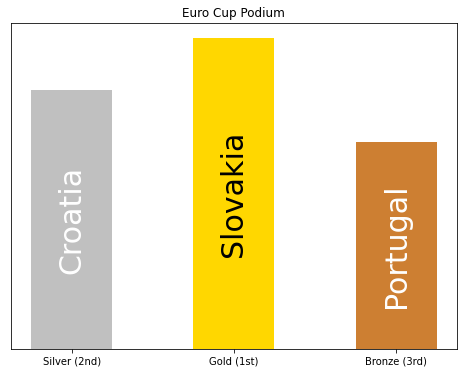

In [0]:
# Collecting names from DataFrames
first_name = first.collect()[0]["Euro_Cup_Winners"]
second_name = second.collect()[0]["Euro_Cup_RunnersUp"]
third_name = third.collect()[0]["Euro_Cup_ThirdPlace"]

# Create podium visualization
plt.figure(figsize=(8, 6))

# Create bars with adjusted positions and heights
plt.bar(1, 1, color='silver', width=0.5)
plt.bar(2, 1.2, color='gold', width=0.5)
plt.bar(3, 0.8, color='#cd7f32', width=0.5)

# Add text annotations with adjusted positions and rotation
plt.text(1, 0.5, second_name, ha='center', va='center', color='white', rotation=90, fontsize=30)
plt.text(2, 0.6, first_name, ha='center', va='center', color='black', rotation=90, fontsize=30)
plt.text(3, 0.4, third_name, ha='center', va='center', color='white', rotation=90, fontsize=30)

# Set axis labels and title
plt.title('Euro Cup Podium')

# Set x-axis ticks to represent positions
plt.xticks([1, 2, 3], ['Silver (2nd)', 'Gold (1st)', 'Bronze (3rd)'])

# Hide y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# Show the plot
plt.show()